# Zombies Spread Dynamics
Simulation of the spread of a zombie epidemic in Europe, based on the modeling of the territory with graph theory, in order to take control measures with military troops and nuclear bombs to save the largest possible population. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import os, tqdm
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

from libraries.dynamics import spread_zombie_dynamics as szd
from libraries.dynamics import graph_by_default

## Network reading
After executing the notebook [graph construction](https://github.com/TEAM-IMT/zombies-spread-dynamics/blob/main/Codes/Challenge_2_graphconstruction.ipynb), the file **All_nodes_graph.gexf** will be generated. For convenience, we provide this file in zip format. The file is then unzipped.

In [2]:
graph_zip = './graph/without_see_nodes_graph_ini_2.zip'
graph_path = graph_zip.replace('.zip','.gexf')
if not os.path.isfile(graph_path):
    if not os.path.isdir('graph'): os.mkdir('graph')
    !unzip $graph_zip -d "./graph"
print('[INFO] File unzip successfully.')

[INFO] File unzip successfully.


## Epidemic spread
As a first view, let's load the network and see the initial state of the two populations

In [3]:
graph_path = './graph/without_see_nodes_graph_ini_2.gexf'
G = nx.readwrite.gexf.read_gexf(graph_path)
ini_date = dt.datetime(year = 2019, month = 8, day = 18)

In [4]:
dynamic = szd(graph = G, INTIAL_DATE = ini_date)
graph_pos = {G.nodes[n]['node_id']:(eval(n)[1],-eval(n)[0]) for n in G.nodes()}

[INFO] Graph was modified ...


In [5]:
dynamic.reset()
dynamic.edgecolor = 'k' # Change to 'k' to see edges in black or 'w' in white
dynamic.graph_pos = graph_pos # Use variable to set an unique perspective

<IPython.core.display.Javascript object>


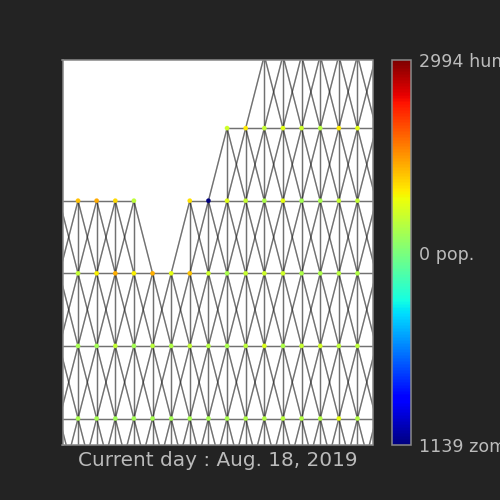

In [6]:
fig, ax = plt.subplots(figsize = (5,5))
dynamic.plot_graph(ax = ax)
ax.grid(False)

In [7]:
print('[INFO] First zombie population in Rize', dynamic.graph.nodes['U45375']['zombie_pop'])
print('[INFO] First human population in Brest', dynamic.graph.nodes['U28058']['human_pop'])

[INFO] First zombie population in Rize 1139
[INFO] First human population in Brest 1532


In [8]:
# Cell aux
for neig in dynamic.graph.neighbors('U45375'):
    print("[INFO] humanpop in",neig,":",dynamic.graph.nodes[neig]['human_pop'],
          "\tzombiepop :",dynamic.graph.nodes[neig]['zombie_pop'],
         "\twith elev {}".format(('U45375',neig)),":",dynamic.graph.edges[('U45375',neig)]['elev_factor'])

[INFO] humanpop in U45697 : 597 	zombiepop : 0 	with elev ('U45375', 'U45697') : 0.0
[INFO] humanpop in U45374 : 1009 	zombiepop : 0 	with elev ('U45375', 'U45374') : 1.0
[INFO] humanpop in U45376 : 746 	zombiepop : 0 	with elev ('U45375', 'U45376') : 0.0
[INFO] humanpop in U45054 : 599 	zombiepop : 0 	with elev ('U45375', 'U45054') : 1.0
[INFO] humanpop in U45696 : 1199 	zombiepop : 0 	with elev ('U45375', 'U45696') : 0.0
[INFO] humanpop in U45698 : 338 	zombiepop : 0 	with elev ('U45375', 'U45698') : 0.0


In [ ]:
# Cell aux
dynamic.step() # Run one step in dynamic procedure
fig, ax = plt.subplots(figsize = (5,5))
dynamic.plot_graph(ax = ax)

In [ ]:
# Cell aux
for neig in dynamic.graph.neighbors('U45375'):
    print("[INFO] humanpop in",neig,":",dynamic.graph.nodes[neig]['human_pop'],
          "\tzombiepop :",dynamic.graph.nodes[neig]['zombie_pop'],
         "\twith elev {}".format(('U45375',neig)),":",dynamic.graph.edges[('U45375',neig)]['elev_factor'])

Now, let's see how it evolves over time, over the course of two months.

In [ ]:
# dynamic.reset()
# dynamic.graph_pos = {G.nodes[n]['node_id']:(eval(n)[1],-eval(n)[0]) for n in G.nodes()}

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
ax_info = {
    "18-08-2019": axs[0,0], "20-08-2019": axs[0,1],
    "22-08-2019": axs[1,0], "18-10-2019": axs[1,1],
}
for epoch in tqdm.tqdm(range(61)): # 2 months
    current_date = "{0:%d-%m-%Y}".format(dynamic.current_date)
    if current_date in ax_info.keys():
        dynamic.plot_graph(ax = ax_info[current_date])
        dynamic.save_checkpoint()
        print(dynamic) # See basic statistics at each iteration
    if current_date == "18-10-2019": break
    dynamic.step() # Run one step in dynamic procedure